

# Підготовка даних до аналізу






<h2>Мета</h2>

Ознайомитись з методикою первинної обробки даних. Після завершення цієї лабораторної роботи ви зможете:

* Досліджувати структуру завантажених даних
* Виправляти формати даних
* Знаходити та заповнювати пропуски в даних
* Знаходити викиди та некоректні значення
* Будувати прості візуалізації

Приблизний час виконання: **90** хвилин


# <h2>Зміст</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<h3>Завдання для тренування</h3>
<ul>
    <li><a href="#data_acquisition">Завантаження даних</a>
    <li><a href="#identify_handle_missing_values">Виявлення та обробка відсутніх значень</a>
    <li><a href="#data_standardization">Стандартизація даних</a></li>
    <li><a href="#data_normalization">Нормалізація даних (центрування/масштабування)</a></li>
    <li><a href="#binning">Групування даних</a></li>
    <li><a href="#indicator">Індикаторні змінні</a></li>
</ul>
    
<h3>Завдання, що оцінюються</h3>
<ul>
    <li><a href="#task1">завдання 1</a></li>
    <li><a href="#task2">завдання 2</a></li>
    <li><a href="#task3">завдання 3</a></li>
    <li><a href="#task4">завдання 4</a></li>
    <li><a href="#task5">завдання 5</a></li>
    <li><a href="#task6">додаткове завдання </a></li>

</ul>
    
</div>

<hr>


<a name="data_acquisition"></a>
## <h2>Завантаження даних з файлу або за URL</h2>


<h3>Джерело даних</h3>
<p>
Існують різні формати для набору даних: .csv, .json, .xlsx  etc. Набір даних можна зберігати в різних місцях: на вашій локальній машині або онлайн.<br>

У нашому випадку набір даних "Automobile Dataset" є онлайн-джерелом у форматі CSV (значення, розділені комами).
<ul>
    <li>Джерело даних: <a href="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork971-2022-01-01" target="_blank">https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data</a></li>
    <li>Тип даних: csv</li>
</ul>
</p>



<h3>Імпорт бібліотек</h3>

Бібліотека Pandas Library — це корисний інструмент, який дозволяє читати різні набори даних у датафрейм.

In [4]:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3
#! mamba install numpy=1.21.2

In [5]:
import pandas as pd
import matplotlib.pylab as plt

<p>
Використаємо функцію <code>pandas.read_csv()</code> для читання csv файлу. У дужках поміщаємо шлях до файлу разом із лапками, щоб pandas читала файл у датафрейм із цієї адреси. Шляхом до файлу може бути URL-адреса або адреса локального файлу. Адресу датасету зручно записати до змінної "filename". <br>

Ви також можете призначити набір даних будь-якій створеній змінній.
</p>

<h3>Завантаження даних з файлу на Google-диску, якщо використовуєте Google Colaboratory</h3>

Якщо ви скачали датасет на свій диск, то для доступу до файлу спочатку потрібно підключити Google Диск до середовища виконання. Підказку як це зробити дивіться тут <a href="https://colab.research.google.com/notebooks/io.ipynb?hl=ua#scrollTo=u22w3BFiOveA">https://colab.research.google.com/notebooks/io.ipynb</a>.

Ви можете лише переглядати, записувати й переміщувати файли.


In [6]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
filename = "/content/drive/My Drive/auto.csv" # коренева папка вашого диску
filename = "/content/drive/My Drive/data/auto.csv" # не коренева папка вашого диску

<h3>Завантаження даних з файлу на локальному комп'ютері, якщо використовуєте Jupyter Notebook</h3>

Якщо ви скачали датасет на локальний комп'ютер і розмістили там же, де і блокнот, тоді шлях до нього вказуйте так:

In [7]:
filename = "auto.csv"

<h3>Завантаження даних за URL</h3>

Потрібний нам датасет зберігається як IBM Cloud object. Запишемо URL датасету до змінної "filename".


In [8]:
filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"

<h3>Читання даних</h3>

Використовуємо метод <code>read_csv()</code> з Pandas для завантаження даних. Оскільки дані не містять заголовків, можемо додати аргумент <code>headers = None</code> в метод <code>read_csv()</code> щоб pandas не встановлювала перший рядок автоматично як заголовок.


In [9]:
df = pd.read_csv(filename, header=None)

<h2>Для чого роблять попередню обробку даних?</h2>

Попередня обробка даних - це процес перетворення даних з їх початкового вигляду у вигляд, зручний для аналізу.

Після прочитання набору даних можемо використати метод <code>dataframe.head(n)</code>, щоб перевірити n верхніх рядків датафрейму, де n — ціле число. На відміну від <code>dataframe.head(n)</code>, <code>dataframe.tail(n)</code> покаже вам n нижніх рядків.

In [10]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<p>
Подивіться на набір даних. Pandas автоматично встановлює заголовок із цілим числом, починаючи з 0.
</p>
<p>
Щоб краще описати наші дані, можемо додати заголовок. Ця інформація доступна за адресою:  <a href="https://archive.ics.uci.edu/ml/datasets/Automobile?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork971-2022-01-01" target="_blank">https://archive.ics.uci.edu/ml/datasets/Automobile</a>.
</p>
<p>
Отже, ми повинні додати заголовки вручну.
</p>
<p>
Спочатку створюємо список 'headers', який містить усі назви стовпців по порядку.
Потім використовуємо <code>dataframe.columns = headers</code> для заміни заголовків створеним нами списком.
</p>

Створюємо Python list 'headers', що містить заголовки стовпчиків - назви ознак.


In [11]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

Замінюємо заголовки та повторно перевіряємо наш датафрейм:


In [12]:
df.columns = headers
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


У відображеному фрагменті бачимо кілька знаків питання; це відсутні значення, які можуть перешкодити подальшому аналізу.

<b>Що робити з відсутніми значеннями?</b>

<ol>
    <li>Виявити всі відсутні значення</li>
    <li>Замінити значення або видалити спостереження чи ознаки</li>
    <li>Скоригувати формат даних</li>
</ol>


<a name="identify_handle_missing_values"></a>
## <h2>Виявлення та обробка відсутніх значень</h2>




<h3 id="identify_missing_values">Виявлення відсутніх значень</h3>

Використовуємо метод <b>info()</b> для відображення основної інформації про датафрейм.


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

 Використовуємо метод <b>describe()</b> для відображення більш детальної інформації про датафрейм.


In [14]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000



<p>
Бачимо статистичний підсумок усіх стовпців із числовим типом (int, float).<br>

Наприклад, ознака 'symboling' має 205 одиниць, середнє значення цього стовпця становить 0.83, стандартне відхилення — 1.25, мінімальне значення — -2, 25-й процентиль — 0, 50-й процентиль — 1, 75-й процентиль — 2 і максимальне значення 3.
<br><br>

Але що, якщо ми також хочемо перевірити всі стовпці, включаючи ті, які мають тип об’єкт?
<br>
Можна додати аргумент <code>include = "all"</code> у дужку.

</p>

In [15]:
df.describe(include = "all")

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


<p>
Тепер він надає статистичний підсумок усіх стовпців, включаючи атрибути типу object, і можемо побачити скільки там унікальних значень, яке з них є верхнім значенням і частоту верхнього значення в стовпцях типу object.<br>

Деякі значення в таблиці відображаються як "NaN". Це тому, що ці числа недоступні для певного типу стовпця.<br>
</p>

<h4>Заміна "?" на NaN</h4>

В датасеті про автомобілі відсутні дані позначені знаком "?".
Ми замінимо "?" на NaN (Not a Number), Python за замовчуванням позначає відсутні дані саме так для пришвидшення обчислень та зручності. Використовуємо функцію:
 <pre>.replace(A, B, inplace = True) </pre>

для заміни A на B.


In [16]:
import numpy as np

# заміна "?" на NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Інколи потрібно виконати заміну не всього значення, а лише його частини. Наприклад, замінити коми на крапки в числах, щоб потім змінити тип даних на числовий. Тоді спочатку змінюємо тип на строковий, виконуємо заміну ком на крапки, і знову міняємо тип на числовий:
 <pre>.astype("str").str.replace(',', '.').astype("float") </pre>


<h4>Оцінка відсутніх даних</h4>

Відсутні значення конвертуються за замовчуванням. Існує два методи для виявлення відсутніх даних:
<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>

Результатом є логічне значення, яке вказує, чи значення, яке передається в аргумент, насправді є відсутніми даними.


In [17]:
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


"True" означає відсутнє значення, а "False" означає, що значення присутнє в наборі даних.

<h4>Підрахунок відсутніх значень в кожному стовпчику</h4>
<p>
Використовуючи цикл <code>for</code> у Python, ми можемо швидко визначити кількість пропущених значень у кожному стовпці. У тілі циклу <code>for</code> метод <code>.value_counts()</code> підраховує кількість значень "True".    
</p>


In [18]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

symboling
symboling
False    205
Name: count, dtype: int64

normalized-losses
normalized-losses
False    164
True      41
Name: count, dtype: int64

make
make
False    205
Name: count, dtype: int64

fuel-type
fuel-type
False    205
Name: count, dtype: int64

aspiration
aspiration
False    205
Name: count, dtype: int64

num-of-doors
num-of-doors
False    203
True       2
Name: count, dtype: int64

body-style
body-style
False    205
Name: count, dtype: int64

drive-wheels
drive-wheels
False    205
Name: count, dtype: int64

engine-location
engine-location
False    205
Name: count, dtype: int64

wheel-base
wheel-base
False    205
Name: count, dtype: int64

length
length
False    205
Name: count, dtype: int64

width
width
False    205
Name: count, dtype: int64

height
height
False    205
Name: count, dtype: int64

curb-weight
curb-weight
False    205
Name: count, dtype: int64

engine-type
engine-type
False    205
Name: count, dtype: int64

num-of-cylinders
num-of-cylinders
False    205
Nam

Виходячи з наведеного вище підсумку, кожен стовпець містить 205 рядків даних і сім стовпців містять відсутні дані:
<ol>
    <li>"normalized-losses": 41 відсутнє значення</li>
    <li>"num-of-doors": 2 відсутніх значення</li>
    <li>"bore": 4 відсутніх значення</li>
    <li>"stroke" : 4 відсутніх значення</li>
    <li>"horsepower": 2 відсутніх значення</li>
    <li>"peak-rpm": 2 відсутніх значення</li>
    <li>"price": 4 відсутніх значення</li>
</ol>


<h3 id="deal_missing_values">Обробка відсутніх значень</h3>

<b>Як обробити відсутні значення?</b>

<ol>
    <li>Видалити дані<br>
        a. Видалити весь рядок (спостереження)<br>
        b. Видалити весь стовпчик (ознаку)
    </li>
    <li>Замінити дані<br>
        a. Замінити середнім значенням<br>
        b. Замінити модою (значенням, що зустрічається найчастіше)<br>
        c. Замінити значенням, порахованим за якоюсь іншою фунцією
    </li>
</ol>


Весь стовпчик слід видаляти, лише якщо більшість записів у ньому відсутні. У нашому наборі даних жоден зі стовпців не є настільки порожнім, щоб повністю його видалити.
Ми маємо певну свободу у виборі методу заміни даних; однак деякі методи можуть здатися більш розумними, ніж інші. Застосуємо наступні методи до вказаних стовпців:

<b>Заміна середнім значенням:</b>
<ul>
    <li>'normalized-losses': 41 відсутнє значення, замінимо їх середнім значенням</li>
    <li>'stroke': 4 відсутніх значення, замінимо їх середнім значенням</li>
    <li>'bore': 4 відсутніх значення, замінимо їх середнім значенням</li>
    <li>'horsepower': 2 відсутніх значення, замінимо їх середнім значенням</li>
    <li>'peak-rpm': 2 відсутніх значення, замінимо їх середнім значенням</li>
</ul>

<b>Заміна модою:</b>
<ul>
    <li>'num-of-doors': 2 відсутніх значення, замінимо їх значенням "four".
        <ul>
            <li>Причина: 84% седанів - чотиридверні. Оскільки чотири двері найчастіше зустрічаються, це найбільш ймовірне значення</li>
        </ul>
    </li>
</ul>

<b>Видалити весь рядок:</b>
<ul>
    <li>'price': 4 відсутніх значення, просто видалимо весь рядок
        <ul>
            <li>Причина: ціна - це те, що ми хочемо передбачити. Будь-яке введення даних без інформації про ціну не можна використовувати для прогнозу; тому будь-який рядок без даних про ціну нам не корисний</li>
        </ul>
    </li>
</ul>


<h4>Обчислення середнього значення для ознаки 'normalized-losses'  </h4>


In [19]:
avg_norm_loss = df['normalized-losses'].astype('float').mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


<h4>Заміна "NaN" на середнє значення ознаки 'normalized-losses'</h4>


In [20]:
df['normalized-losses'].replace(np.nan, avg_norm_loss, inplace=True)

<h4>Обчислення середнього значення для ознаки 'bore'</h4>


In [21]:
avg_bore=df['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.3297512437810943


<h4>Заміна "NaN" на середнє значення ознаки 'bore'</h4>


In [22]:
df['bore'].replace(np.nan, avg_bore, inplace=True)

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<h2> Завдання  #1: </h2>

<p>Спираючись на попередні приклади, замініть NaN для ознаки 'stroke' середніми значеннями.</p>
</div>


In [23]:
avg_stroke = df['stroke'].astype('float').mean()
df['stroke'].replace(np.nan, avg_stroke, inplace=True) 

# Валідація
if df['stroke'].isnull().values.any():
    print("Спробуй знайти помилку")
else:
    print("Чудово, все правильно.")

Чудово, все правильно.


<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python
# Розрахунок середнього значення для ознаки "stroke"
avg_stroke = df["stroke"].astype("float").mean(axis = 0)
print("Average of stroke:", avg_stroke)

# Заміна NaN середнім значенням ознаки "stroke"
df["stroke"].replace(np.nan, avg_stroke, inplace = True)
```

</details>



<h4>Обчислення середнього значення для ознаки 'horsepower'</h4>


In [24]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

Average horsepower: 104.25615763546799


<h4>Заміна "NaN" на середнє значення ознаки 'horsepower'</h4>


In [25]:
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

<h4>Обчислення середнього значення для ознаки 'peak-rpm'</h4>


In [26]:
avg_peakrpm=df['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

Average peak rpm: 5125.369458128079


<h4>Заміна "NaN" на середнє значення ознаки 'peak-rpm'</h4>


In [27]:
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

<h4>Заміна пропусків в 'num-of-doors' значенням, що найчастіше зустрічається в датасеті</h4>


Щоб побачити, які значення присутні в певному стовпці, можемо використати метод <code>.value_counts()</code>:

In [28]:
df['num-of-doors'].value_counts()

num-of-doors
four    114
two      89
Name: count, dtype: int64

Бачимо, що чотири двері є найпоширенішим типом. Також можемо використовувати метод <code>.idxmax()</code>, щоб автоматично обчислити найпоширеніший тип:


In [29]:
df['num-of-doors'].value_counts().idxmax()

'four'

Процедура заміни дуже схожа на ту, яку робили раніше:


In [30]:
# заміна пропусків в 'num-of-doors' значенням, що найчастіше зустрічається в датасеті
df['num-of-doors'].replace(np.nan, 'four', inplace=True)

<h4>Видалення рядків, де відсутні значення 'price'</h4>


Нарешті, видалимо всі рядки, які не містять даних про ціни:


In [31]:
# просто видаляємо весь рядок з NaN в "price"
df.dropna(subset=['price'], axis=0, inplace=True)

# оновлюємо індекси, тому що видалили два рядки
df.reset_index(drop=True, inplace=True)

In [32]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Тепер маємо датасет без пропущених значень.


<h3 id="correct_data_format">Виправлення форматів даних</h3>

<p>Останнім етапом очищення даних є перевірка, що всі дані мають правильний формат (int, float, text або інші).</p>

В Pandas використовуємо:
<p><b>.dtype()</b> щоб перевірити тип даних</p>
<p><b>.astype()</b> щоб змінити тип даних</p>


<h4>Переглянемо типи даних для кожного стовпця</h4>


In [33]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

<p>Як бачимо, деякі стовпці мають неправильний тип даних. Числові змінні повинні мати тип 'float' або 'int', а змінні з рядками, наприклад категорії, повинні мати тип 'object'. Наприклад, змінні 'bore' і 'stroke' є числовими значеннями, які описують двигуни, тому ми очікуємо, що вони будуть типу 'float' або 'int'; однак вони відображаються як тип 'object'. Потрібно перетворити типи даних у відповідний формат для кожного стовпця за допомогою методу <code>astype()</code>.</p>


<h4>Перетворення типів даних у правильний формат</h4>


In [34]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

Переглянемо типи стовпців після перетворення


In [35]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

Тепер нарешті отримали очищений набір даних без пропущених значень з усіма даними у належному форматі.


<a name="data_standardization"></a>
## <h2>Стандартизація даних</h2>

<p>
Дані зазвичай збираються з різних джерел у різних форматах.</p>
    
<b>Що таке стандартизація?</b>
<p>Стандартизація — це процес перетворення даних у загальний формат, що дозволяє досліднику робити значуще порівняння. (Стандартизація даних також є терміном для певного типу нормалізації даних, коли ми віднімаємо середнє значення та ділимо на стандартне відхилення.)
</p>

Приклад:  Перетворення mpg на л/100км.</p>
<p>У нашому наборі даних стовпці споживання палива 'city-mpg' і 'highway-mpg' представлено в одиницях mpg (миль на галон). Припустімо, що розробляємо програму в країні, яка приймає стандарт споживання палива л/100 км.</p>
<p>Потрібно буде застосувати <b>перетворення даних</b>, щоб перетворити милі на галон у л/100 км.</p>    


<p>Формула перетворення одиниць має вигляд:<p>
L/100km = 235 / mpg
<p>Ми можемо виконувати багато математичних операцій безпосередньо в Pandas.</p>


In [36]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [37]:
# перетворюємо mpg на л/100км за допомогою математичної операції (235 ділимо на mpg)
df['city-L/100km'] = 235/df['city-mpg']

# перевіряємо трансформовані дані
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<h2> Завдання  #2: </h2>

<p>Відповідно до прикладу вище, перетворіть милі на галон на л/100 км у стовпці 'highway-mpg' і змініть назву стовпця на 'highway-L/100km'.</p>
</div>


In [38]:
df['highway-mpg'] = 235/df['highway-mpg']
df.rename(columns = {'highway-mpg' : 'highway-L/100km'}, inplace = True)
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556
5,2,122,audi,gas,std,two,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,8.5,110,5500.0,19,9.400000,15250.0,12.368421
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,mpfi,3.19,3.40,8.5,110,5500.0,19,9.400000,17710.0,12.368421
7,1,122,audi,gas,std,four,wagon,fwd,front,105.8,...,mpfi,3.19,3.40,8.5,110,5500.0,19,9.400000,18920.0,12.368421
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,mpfi,3.13,3.40,8.3,140,5500.0,17,11.750000,23875.0,13.823529
9,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,mpfi,3.50,2.80,8.8,101,5800.0,23,8.103448,16430.0,10.217391


<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python
# перетворюємо mpg на л/100км за допомогою математичної операції (235 ділимо на mpg)
df["highway-mpg"] = 235/df["highway-mpg"]

# змінюємо назву стовпчика з "highway-mpg" на "highway-L/100km"
df.rename(columns={'"highway-mpg"':'highway-L/100km'}, inplace=True)

# перевіряємо трансформовані дані
df.head()

```
</details>




<a name="data_normalization"></a>
## <h2>Нормалізація даних</h2>

<b>Навіщо нормалізація?</b>
<p>Нормалізація — це процес перетворення значень кількох змінних у подібний діапазон. Типові нормалізації включають масштабування змінної, щоб середнє значення змінної дорівнювало 0, масштабування змінної, щоб дисперсія дорівнювала 1, або масштабування змінної, щоб значення змінної змінювалися в межах від 0 до 1.
</p>

<b>Приклад</b>
<p>Щоб продемонструвати нормалізацію, масштабуємо ознаки 'length', 'width' та 'height'.</p>
<p><b>Ціль:</b> хочемо нормалізувати ці змінні, щоб їхні значення були в діапазоні від 0 до 1</p>
<p><b>Підхід:</b> заміняємо вихідне значення на (первинне значення)/(максимальне значення)</p>


In [39]:
# заміняємо вихідне значення на (первинне значення)/(максимальне значення)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<h2> Завдання #3: </h2>

<p>Спираючись на попередній приклад, нормалізуйте ознаку 'height'.</p>
</div>


In [40]:
df['height'] = df['height']/df['height'].max()
df['height'].head(10)

0    0.816054
1    0.816054
2    0.876254
3    0.908027
4    0.908027
5    0.887960
6    0.931438
7    0.931438
8    0.934783
9    0.908027
Name: height, dtype: float64

<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python
df['height'] = df['height']/df['height'].max()

# переглянемо нормалізовані ознаки
df[["length","width","height"]].head()


```
</details>




Бачимо, що нормалізували 'length', 'width' та 'height' в діапазоні [0,1].

<a name="binning"></a>
## <h2>Групування даних</h2>

<b>Навіщо групувати?</b>
<p>
    Групування — це процес перетворення неперервних числових змінних у дискретні категоріальні групи-"bins" для згрупованого аналізу.
</p>

<b>Приклад: </b>
<p>В нашому датасеті 'horsepower' — це змінна з дійсними значенням у діапазоні від 48 до 288 і має 59 унікальних значень. Що, якщо нас цікавить лише різниця в ціні між автомобілями з високою, середньою та малою потужністю (3 типи)? Чи можемо ми зібрати їх у три групи-"bins", щоб спростити аналіз?</p>

<p>Ми використаємо метод pandas <code>cut()</code>, щоб розділити стовпець 'horsepower' на 3 групи.</p>


<h3>Приклад групування даних Pandas</h3>


 Перетворимо дані в правильний формат:


In [43]:
df['horsepower']=df['horsepower'].astype(int, copy=True)

Давайте побудуємо гістограму 'horsepower', щоб побачити, як виглядає розподіл.

Text(0.5, 1.0, 'horsepower bins')

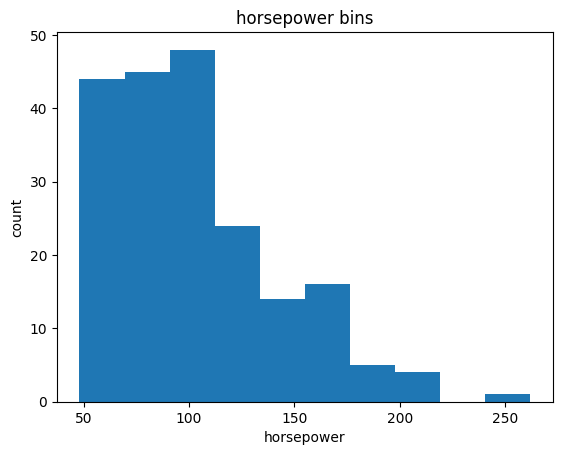

In [44]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df['horsepower'])

# вказуємо підписи осей x/y та заголовок діаграми
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

<p>Нам потрібні 3 групи однакового розміру, тому використовуємо функцію з numpy <code>linspace(start_value, end_value, numbers_generated</code>.</p>
<p>Оскільки хочемо включити мінімальне значення 'horsepower', встановлюємо <code>start_value = min(df['horsepower'])</code>.</p>
<p>Оскільки хочемо включити максимальне значення 'horsepower', встановлюємо <code>end_value = max(df['horsepower'])</code>.</p>
<p>Оскільки будуємо 3 групи однакової довжини, має бути 4 розділювачі, отже <code>numbers_generated = 4</code>.</p>


Створюємо масив груп від мінімального до максимального значення, використовуючи параметри, вказані вище. Значення визначатимуть, коли закінчується одна група і починається інша.

In [45]:
bins = np.linspace(min(df['horsepower']), max(df['horsepower']), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

 Задаємо назви груп:


In [46]:
group_names = ["Low", "Medium", "High"]

Застосовуємо функцію <code>cut()</code>, щоб визначити, до якої групи належить кожне значення `df['horsepower']`.

In [47]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


Подивимося кількість транспортних засобів у кожній групі:


In [48]:
df['horsepower-binned'].value_counts()

horsepower-binned
Low       153
Medium     43
High        5
Name: count, dtype: int64

Побудуємо стовпчасту діаграму для порівняння кількості елементів в групах:


Text(0.5, 1.0, 'horsepower bins')

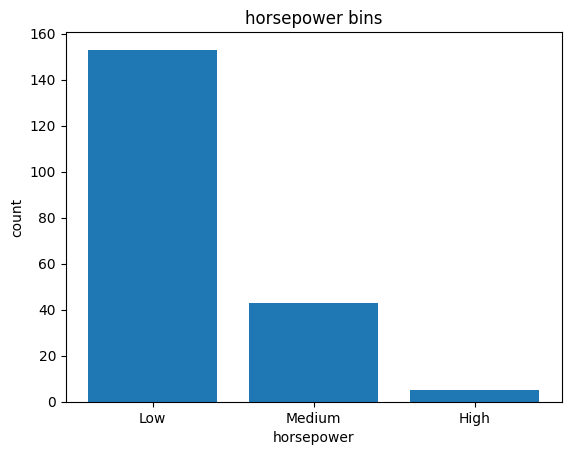

In [49]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df['horsepower-binned'].value_counts())

# вказуємо підписи осей x/y та заголовок діаграми
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

<p>
    Уважно подивіться на датафрейм вище. Ви побачите, що в останньому стовпчику наведено групи для 'horsepower' на основі 3 категорій ("Low", "Medium" та "High"). Ми успішно зменшили кількість інтервалів з 59 до 3.
</p>


<h3>Візуалізація груп</h3>
Зазвичай для візуалізації розподілу груп використовується гістограма.

Text(0.5, 1.0, 'horsepower bins')

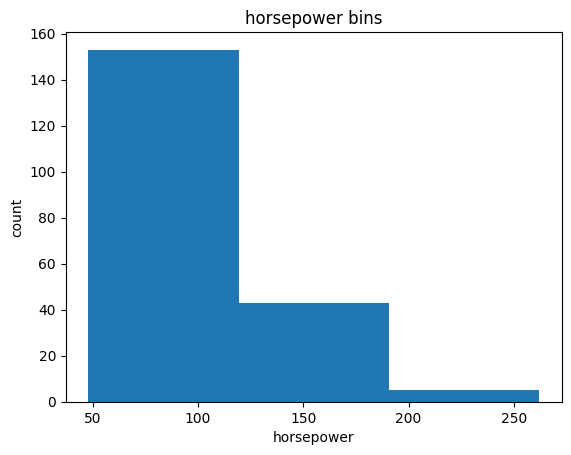

In [50]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot


# будуємо гістограму для ознаки 'horsepower' з кількістю груп bins = 3
plt.pyplot.hist(df['horsepower'], bins = 3)

# вказуємо підписи осей x/y та заголовок діаграми
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Графік вище показує результат групування для ознаки 'horsepower'.

<a name="indicator"></a>
## <h2>Індикаторні змінні (Dummy Variable)</h2>

<b>Що таке індикаторна змінна?</b>
<p>
    Змінна-індикатор (або фіктивна змінна) — це числова змінна, яка використовується для позначення категорій. Їх називають "dummies" (фіктивними), тому що самі числа не мають внутрішнього значення.
</p>

<b>Чому використовуємо змінні-індикатори?</b>
<p>
    Змінні-індикатори потрібні, щоб можна було використовувати категоріальні змінні для регресійного аналізу.
</p>

<b>Приклад</b>
<p>
   Бачимо, що ознака 'fuel-type' має два унікальних значення: "gas" або "diesel". Регресія не розуміє слів, розуміє лише числа. Щоб використовувати цей атрибут у регресійному аналізі, перетворюємо 'fuel-type' на індикаторні змінні.
</p>

<p>
    Ми будемо використовувати метод pandas <b>get_dummies()</b> для призначення числових значень різним категоріям типу палива.
</p>


In [51]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100km', 'price', 'city-L/100km', 'horsepower-binned'],
      dtype='object')

Отримуємо індикаторні змінні та створюємо з них датафрейм "dummy_variable_1":

In [52]:
dummy_variable_1 = pd.get_dummies(df['fuel-type'])
dummy_variable_1.head()

,diesel,gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


Змінюємо назви стовпців для ясності:


In [53]:
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,False,True
1,False,True
2,False,True
3,False,True
4,False,True


В датафреймі стовпець 'fuel-type' тепер має значення для "gas" і "diesel" як 0 і 1.

In [54]:
# об'єднуємо датафрейми "df" та "dummy_variable_1"
df = pd.concat([df, dummy_variable_1], axis=1)

# видаляємо вихідну ознаку 'fuel-type' з "df"
df.drop('fuel-type', axis = 1, inplace=True)

In [55]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,13495.0,11.190476,Low,False,True
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111,5000.0,21,8.703704,16500.0,11.190476,Low,False,True
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154,5000.0,19,9.038462,16500.0,12.368421,Medium,False,True
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102,5500.0,24,7.833333,13950.0,9.791667,Low,False,True
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115,5500.0,18,10.681818,17450.0,13.055556,Low,False,True


Останні два стовпці тепер представляють індикаторні змінні для ознаки 'fuel-type'. Зараз усі вони 0 і 1.

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<h2> Завдання  #4: </h2>

<p>Спираючись на попередній приклад, створіть індикаторні змінні для ознаки 'aspiration'</p>
</div>


In [59]:
dummy_asp = pd.get_dummies(df['aspiration'])
dummy_asp.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

dummy_asp.head(10)

,aspiration-std,aspiration-turbo
0,True,False
1,True,False
2,True,False
3,True,False
4,True,False
5,True,False
6,True,False
7,True,False
8,False,True
9,True,False


<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python
# отримати індикаторні змінні для aspiration та створити з них датафрейм "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['aspiration'])

# змінити назви стовпців для ясності
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# показати перші 5 екземплярів даних з датафрейму "dummy_variable_2"
dummy_variable_2.head()


```
</details>




 <div class="alert alert-success alertsuccess" style="margin-top: 20px">
<h2> Завдання  #5: </h2>

<p>Об’єднайте новий датафрейм із вихідним датафреймом, а потім видаліть ознаку 'aspiration'.</p>
</div>


In [70]:
df = pd.concat([df, dummy_asp], axis=1)
df.drop('aspiration', axis = 1, inplace=True)
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,highway-L/100km,price,city-L/100km,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,8.703704,13495.0,11.190476,Low,False,True,True,False,True,False
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,8.703704,16500.0,11.190476,Low,False,True,True,False,True,False
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,9.038462,16500.0,12.368421,Medium,False,True,True,False,True,False
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,7.833333,13950.0,9.791667,Low,False,True,True,False,True,False
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,10.681818,17450.0,13.055556,Low,False,True,True,False,True,False


<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python
# об'єднати датафрейми
df = pd.concat([df, dummy_variable_2], axis=1)

# видалити оригінальну ознаку "aspiration" з "df"
df.drop('aspiration', axis = 1, inplace=True)


```
</details>




Використайте метод <b>describe()</b> для відображення інформації про датафрейм. Переконайтесь, що вся попередня обробка даних завершена.


In [69]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,10.164279,103.402985,5117.665368,25.179104,8.044957,13207.129353,9.944145
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,4.004965,37.365650,478.113805,6.423220,1.840739,7947.066342,2.534599
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,4.351852,5118.000000,4.795918
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,6.911765,7775.000000,7.833333
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,7.833333,10295.000000,9.791667
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,9.400000,16500.000000,12.368421
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,14.687500,45400.000000,18.076923


## <h2>Збереження даних</h2>
<p>
Pandas дозволяє нам зберігати набір даних у форматі CSV. Використовуючи метод <b>dataframe.to_csv()</b>, ви можете додати шлях до файлу та назву разом із лапками в дужках.
</p>
<p>
Наприклад, якщо ви хочете зберегти фрейм даних "df" як "auto1.csv", можете використати наведений нижче синтаксис, де <code>index = False</code > означає, що назви рядків не будуть записані.
</p>



In [71]:
df.to_csv("auto1.csv", index=False)

<h3>Read/Save інших форматів даних</h3>

| Data Formate |        Read       |            Save |
| ------------ | :---------------: | --------------: |
| csv          |  `pd.read_csv()`  |   `df.to_csv()` |
| json         |  `pd.read_json()` |  `df.to_json()` |
| excel        | `pd.read_excel()` | `df.to_excel()` |
| hdf          |  `pd.read_hdf()`  |   `df.to_hdf()` |
| sql          |  `pd.read_sql()`  |   `df.to_sql()` |
| ...          |        ...        |             ... |

Якщо використовуєте Google Colaboratory, але хочете зберегти файл з даними на локальний комп'ютер, скористайтесь наступною командою

In [ ]:
from google.colab import files

files.download('auto1.csv')

<a name="task"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

# <h1 id="task">Завдання, що оцінюються </h1>

</div>





1. Скачати дані із файлу <a href="https://drive.google.com/file/d/1Vz4Kkbu4HVMuBKsOz_5gq3C8jYYXA89d/view?usp=drive_link" target="_blank">'Data2.csv'</a>. Записати дані у dataframe. Дослідити структуру даних.
2. Виправити помилки в даних.
3. Заповнити пропуски.
4. Додати стовпчик із щільністю населення.
5. Побудувати діаграми розмаху та гістограми.


<a name="task1"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task1">Завдання  #1: </h2>

<p>Дослідити структуру даних</p>
</div>


Зчитую дані з файлу у датафрейм


In [90]:
df = pd.read_csv('Data2.csv', encoding='cp1252', sep=';')
df

,Country Name,Region,GDP per capita,Populatiion,CO2 emission,Area
0,Afghanistan,South Asia,"561,7787463",34656032.0,"9809,225",652860
1,Albania,Europe & Central Asia,"4124,98239",2876101.0,"5716,853",28750
2,Algeria,Middle East & North Africa,"3916,881571",40606052.0,"145400,217",2381740
3,American Samoa,East Asia & Pacific,"11834,74523",55599.0,NaN,200
4,Andorra,Europe & Central Asia,"36988,62203",77281.0,"462,042",470
...,...,...,...,...,...,...
212,Virgin Islands (U.S.),Latin America & Caribbean,NaN,102951.0,NaN,350
213,West Bank and Gaza,Middle East & North Africa,"2943,404534",4551566.0,NaN,6020
214,"Yemen, Rep.",Middle East & North Africa,"990,334774",27584213.0,"22698,73",527970
215,Zambia,Sub-Saharan Africa,"1269,573537",16591390.0,"4503,076",752610


<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python
DATA_PATH = 'data/Data2.csv'

# Зчитуємо файл із заданим розділяючим символом ";"
df = pd.read_csv(DATA_PATH, sep=';')

'''
Зауваження: попередній код зчитування з файлу підходить для
файлів з кодуванням utf-8. Проте файл Data2.csv спочатку мав інше
кодування. Дане кодування потрібно вказати в якості параметру:
    
'''

df = pd.read_csv(DATA_PATH, sep=';', encoding='cp1252')


```
</details>




Досліджую структуру даних


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    217 non-null    object 
 1   Region          217 non-null    object 
 2   GDP per capita  190 non-null    object 
 3   Populatiion     216 non-null    float64
 4   CO2 emission    205 non-null    object 
 5   Area            217 non-null    object 
dtypes: float64(1), object(5)
memory usage: 10.3+ KB


Скориставшись цим методом, помічаємо проблему 2 та проблему 3. 
Для цього потрібно спочатку усунути проблему 1 - у полях GDP per capita, CO2 emission та Area
змінити роздільник для чисел з коми на крапку. Після виконання виправлень цих проблем варто провести повторне дослідження даних.

In [118]:
df.describe(include = "all") # перевіряємо всі стовпці 

,Country Name,Region,GDP per capita,Populatiion,CO2 emission,Area
count,217,217,190,2.160000e+02,205,217
unique,217,7,190,NaN,202,213
top,Afghanistan,Europe & Central Asia,"561,7787463",NaN,"6318,241",460
freq,1,58,1,NaN,2,3
mean,NaN,NaN,NaN,3.432256e+07,NaN,NaN
std,NaN,NaN,NaN,1.347600e+08,NaN,NaN
min,NaN,NaN,NaN,1.109700e+04,NaN,NaN
25%,NaN,NaN,NaN,7.900265e+05,NaN,NaN
50%,NaN,NaN,NaN,6.221590e+06,NaN,NaN
75%,NaN,NaN,NaN,2.350337e+07,NaN,NaN


Визначимо всі стовпці з NaN значеннями

In [113]:
columns_with_nan = df.columns[df.isna().any()].tolist()
columns_with_nan 

Country Name       0
Region             0
GDP per capita    27
Populatiion        1
CO2 emission      12
Area               0
dtype: int64

Звідси випливає проблема 4

Бачу наступні проблеми в даних:
1. Змінити роздільник з коми на крапку у стовпцях, що мають позначати чисельні дані
2. Для стовпців CO2 emission, GDP per capita - варто встановити тип даних float
3. Для стовпців Area, Populatiion варто встановити тип даних int (Для Area - дещо спірно, але у вихідному файлі - int)
4. Є пропущені значення в ознаках: GDP per capita, Populatiion, CO2 emission


<a name="task2"></a> <div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task2"> Завдання  #2: </h2>

<p>Виправити помилки в даних</p>
</div>


<b>Проблема 1.</b>
<p>
    Для виправлення застосую метод replace() та заміню всі включення знаку ',' у вибраних стовпцях на '.'
</p>

In [131]:
replaced_columns = ['GDP per capita', 'CO2 emission', 'Area']
df[replaced_columns] = df[replaced_columns].replace(',', '.', regex=True)
df

,Country Name,Region,GDP per capita,Populatiion,CO2 emission,Area
0,Afghanistan,South Asia,561.7787463,34656032.0,9809.225,652860
1,Albania,Europe & Central Asia,4124.98239,2876101.0,5716.853,28750
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217,2381740
3,American Samoa,East Asia & Pacific,11834.74523,55599.0,NaN,200
4,Andorra,Europe & Central Asia,36988.62203,77281.0,462.042,470
...,...,...,...,...,...,...
212,Virgin Islands (U.S.),Latin America & Caribbean,NaN,102951.0,NaN,350
213,West Bank and Gaza,Middle East & North Africa,2943.404534,4551566.0,NaN,6020
214,"Yemen, Rep.",Middle East & North Africa,990.334774,27584213.0,22698.73,527970
215,Zambia,Sub-Saharan Africa,1269.573537,16591390.0,4503.076,752610


<b>Проблема 2.</b>
<p>
    Для виправлення зміню тип даних стовпців CO2 emission, GDP per capita на float
</p>

In [136]:
to_float_columns = ['CO2 emission', 'GDP per capita']
df[to_float_columns] = df[to_float_columns].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    217 non-null    object 
 1   Region          217 non-null    object 
 2   GDP per capita  190 non-null    float64
 3   Populatiion     216 non-null    float64
 4   CO2 emission    205 non-null    float64
 5   Area            217 non-null    object 
dtypes: float64(3), object(3)
memory usage: 10.3+ KB


<b>Проблема 3.</b>
<p>
    Для виправлення зміню тип даних стовпців Populatiion, Area на int
</p>

In [146]:
to_int_columns = ['Populatiion', 'Area']
df[to_int_columns] = df[to_int_columns].round().astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    217 non-null    object 
 1   Region          217 non-null    object 
 2   GDP per capita  190 non-null    float64
 3   Populatiion     216 non-null    Int64  
 4   CO2 emission    205 non-null    float64
 5   Area            217 non-null    Int64  
dtypes: Int64(2), float64(2), object(2)
memory usage: 10.7+ KB


<a name="task3"></a>
<div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task3"> Завдання  #3: </h2>

<p>Заповнити пропуски</p>
</div>


Заповнювати пропуски для ознаки буду таким способ:
Створю словник, який буде мати такий вигляд:

        region: pop_density, mean_gdp, CO2_per_person

Для кожного регіону визначимо середню щільність населення у цьому регіоні, середній рівень ввп у регіоні, та середній викид СO2 у цьому регіоні на особу

In [178]:
regions = df['Region'].unique() # отримую список регіонів
print(regions) 

['South Asia' 'Europe & Central Asia' 'Middle East & North Africa'
 'East Asia & Pacific' 'Sub-Saharan Africa' 'Latin America & Caribbean'
 'North America']


Знаходжу щільність населення для кожного регіону 

In [179]:
pop_density_per_region = []

for reg in regions:
    region_df = df[df['Region'] == reg]  
    mean_area = region_df['Area'].mean()   # середня площа країни в регіоні
    mean_population = region_df['Populatiion'].mean()   # середня кількість населення країни
    
    pop_density_per_region.append( mean_population / mean_area)  

print(pop_density_per_region)


[343.9666814206596, 32.043556165791685, 38.407850026704814, 96.99910104401015, 43.22674360734189, 31.21906541940771, 18.1406488015127]


Знаходжу середній ввп на душу населення

In [180]:
mean_gdp_list = []

for reg in regions:
    region_df = df[df['Region'] == reg]  
    mean_gdp = region_df['GDP per capita'].mean()   # середній ввп на душу населення у регіоні
    
    mean_gdp_list.append(mean_gdp) 

print(mean_gdp_list)

[2795.2139349749996, 24018.131492772547, 15794.757385444442, 15278.87064805882, 2174.20366092, 9140.125952009375, 49910.727095]


Знаходжу середній рівень викиду CO2 на душу населення

In [181]:
emission_list = []

for reg in regions:
    region_df = df[df['Region'] == reg]  
    mean_population = region_df['Populatiion'].mean()   # середня кількість населення країни
    mean_emission = region_df['CO2 emission'].mean()   # середня рівень викидів країн регіоні
        
    emission_list.append(mean_population / mean_emission) #  середній рівень викидів на душу населення

print(emission_list)

[701.9389049558132, 133.602954949088, 160.54597257416503, 149.17062679065197, 1286.1575992234382, 313.07421349438727, 62.06427119453013]


Створюю словник

In [209]:
work_dict = {region: [pop_density_per_region[i], mean_gdp_list[i], emission_list[i]] for i, region in enumerate(regions)}
for region, values in work_dict.items():
    print(f"Регіон: {region}")
    print(f"Щільність населення: {values[0]}")
    print(f"Середній ВВП на людину: {values[1]}")
    print(f"Середній рівень викидів на особу: {values[2]}")
    print()


Регіон: South Asia
Щільність населення: 343.9666814206596
Середній ВВП на людину: 2795.2139349749996
Середній рівень викидів на особу: 701.9389049558132

Регіон: Europe & Central Asia
Щільність населення: 32.043556165791685
Середній ВВП на людину: 24018.131492772547
Середній рівень викидів на особу: 133.602954949088

Регіон: Middle East & North Africa
Щільність населення: 38.407850026704814
Середній ВВП на людину: 15794.757385444442
Середній рівень викидів на особу: 160.54597257416503

Регіон: East Asia & Pacific
Щільність населення: 96.99910104401015
Середній ВВП на людину: 15278.87064805882
Середній рівень викидів на особу: 149.17062679065197

Регіон: Sub-Saharan Africa
Щільність населення: 43.22674360734189
Середній ВВП на людину: 2174.20366092
Середній рівень викидів на особу: 1286.1575992234382

Регіон: Latin America & Caribbean
Щільність населення: 31.21906541940771
Середній ВВП на людину: 9140.125952009375
Середній рівень викидів на особу: 313.07421349438727

Регіон: North Ameri

Заповнимо пусті значення у стовпці Population. Для цього домножимо площу країни з пустим стовпцем даних про населення на середній рівень щільності населення у регіоні. Оскільки є всього лиш одна країна, населення якої ми не знаємо, можна також просто видалити цей рядок. Але допустимо, що нам важливо мати хоча б приблизні відомості.

In [198]:
df['Populatiion'] = df.apply(lambda row: row['Area'] * work_dict.get(row['Region'], [])[0] if pd.isnull(row['Populatiion']) else row['Populatiion'], axis=1)
missing_population_rows = df[df['Populatiion'].isnull()]
print(missing_population_rows)

Empty DataFrame
Columns: [Country Name, Region, GDP per capita, Populatiion, CO2 emission, Area]
Index: []


    ВВП на душу населення = середньому ВВП на душу населення у регіоні

In [203]:
missing_values_rows = df[df['GDP per capita'].isnull()]
print(missing_values_rows)

df['GDP per capita'] = df.apply(lambda row: work_dict.get(row['Region'], [])[1] if pd.isnull(row['GDP per capita']) else row['GDP per capita'], axis=1)

                  Country Name                      Region  GDP per capita  \
9                        Aruba   Latin America & Caribbean             NaN   
21                     Bermuda               North America             NaN   
27      British Virgin Islands   Latin America & Caribbean             NaN   
36              Cayman Islands   Latin America & Caribbean             NaN   
39             Channel Islands       Europe & Central Asia             NaN   
49                        Cuba   Latin America & Caribbean             NaN   
50                     Curacao   Latin America & Caribbean             NaN   
54                    Djibouti  Middle East & North Africa             NaN   
61                     Eritrea          Sub-Saharan Africa             NaN   
64               Faroe Islands       Europe & Central Asia             NaN   
68            French Polynesia         East Asia & Pacific             NaN   
74                   Gibraltar       Europe & Central Asia      

In [204]:
missing_values_rows = df[df['GDP per capita'].isnull()]
print(missing_values_rows)

Empty DataFrame
Columns: [Country Name, Region, GDP per capita, Populatiion, CO2 emission, Area]
Index: []


Маючи кількість населення для кожної країни заповнюватимемо пропуски таким чином:
    Рівень викидів країни = Кількість населення * Рівень викидів на особу

In [213]:
missing_values_rows = df[df['CO2 emission'].isnull()]
print(missing_values_rows)

df['CO2 emission'] = df.apply(lambda row: row['Populatiion'] * work_dict.get(row['Region'], [])[2] if pd.isnull(row['CO2 emission']) else row['CO2 emission'], axis=1)

                 Country Name                      Region  GDP per capita  \
3              American Samoa         East Asia & Pacific    11834.745230   
39            Channel Islands       Europe & Central Asia    24018.131493   
78                       Guam         East Asia & Pacific    35562.567530   
93                Isle of Man       Europe & Central Asia    24018.131493   
104                    Kosovo       Europe & Central Asia     3661.429847   
130                    Monaco       Europe & Central Asia    24018.131493   
145  Northern Mariana Islands         East Asia & Pacific    22572.378820   
157               Puerto Rico   Latin America & Caribbean    30790.104790   
163                San Marino       Europe & Central Asia    47908.561410   
182  St. Martin (French part)   Latin America & Caribbean     9140.125952   
212     Virgin Islands (U.S.)   Latin America & Caribbean     9140.125952   
213        West Bank and Gaza  Middle East & North Africa     2943.404534   

Перевірка

In [214]:
missing_values_rows = df[df['CO2 emission'].isnull()]
print(missing_values_rows)

Empty DataFrame
Columns: [Country Name, Region, GDP per capita, Populatiion, CO2 emission, Area]
Index: []


Загальна перевірка

In [215]:
columns_with_nan = df.columns[df.isna().any()].tolist()
columns_with_nan 

[]

Ще раз переглянемо відомості про набір даних

In [216]:
df.describe(include = "all")

,Country Name,Region,GDP per capita,Populatiion,CO2 emission,Area
count,217,217,217.000000,2.170000e+02,2.170000e+02,217.0
unique,217,7,NaN,NaN,NaN,<NA>
top,Afghanistan,Europe & Central Asia,NaN,NaN,NaN,<NA>
freq,1,58,NaN,NaN,NaN,<NA>
mean,NaN,NaN,13596.316609,3.418782e+07,1.014291e+07,612608.248848
std,NaN,NaN,17288.861530,1.344623e+08,8.907455e+07,1829939.567799
min,NaN,NaN,-6722.223536,1.109700e+04,1.100100e+01,-676590.0
25%,NaN,NaN,2174.203661,7.956010e+05,1.954511e+03,10450.0
50%,NaN,NaN,6924.149775,6.149928e+06,1.156205e+04,92225.0
75%,NaN,NaN,16529.540970,2.343919e+07,8.256251e+04,447400.0


Звідси випливає проблема 5 - наявність не валідних значень у стовпцях 'GDP per capita' та 'Area'. Виправимо цю помилку таким чином: у кожному рядку, де зустрічається від'ємні значення присвоюємо для відповідного стовпця те саме значення по модулю. 

*Важливо:* 
<p>Середній рівень ВВП в регіоні ми обраховували з врахуванням пізніше виявлених невалідних даних, те саме і з середньою густиною населення. Тому, для більш точного аналізу варто переробити цю частину роботи. Проте зараз обійдемося лише виправленням невалідних даних

In [217]:
df['GDP per capita'] = df.apply(lambda row: abs(row['GDP per capita']) if row['GDP per capita'] < 0 else row['GDP per capita'], axis=1)
df['Area'] = df.apply(lambda row: abs(row['Area']) if row['Area'] < 0 else row['Area'], axis=1)

In [218]:
df.describe(include = "all")

,Country Name,Region,GDP per capita,Populatiion,CO2 emission,Area
count,217,217,217.000000,2.170000e+02,2.170000e+02,2.170000e+02
unique,217,7,NaN,NaN,NaN,NaN
top,Afghanistan,Europe & Central Asia,NaN,NaN,NaN,NaN
freq,1,58,NaN,NaN,NaN,NaN
mean,NaN,NaN,13658.272586,3.418782e+07,1.014291e+07,6.188441e+05
std,NaN,NaN,17239.731169,1.344623e+08,8.907455e+07,1.827830e+06
min,NaN,NaN,285.727442,1.109700e+04,1.100100e+01,2.000000e+00
25%,NaN,NaN,2175.673442,7.956010e+05,1.954511e+03,1.088700e+04
50%,NaN,NaN,6924.149775,6.149928e+06,1.156205e+04,9.303000e+04
75%,NaN,NaN,16529.540970,2.343919e+07,8.256251e+04,4.474200e+05


Як бачимо, невалідні значення усунуті.

 <a name="task4"></a>
 <div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task4"> Завдання  #4: </h2>

<p>Додати стовпчик із щільністю населення</p>
</div>


Щільність населення розрахую за формулою:
Щільність населення = Населення/Площа


In [219]:
df['Population density'] = df['Populatiion'] / df['Area']
df

,Country Name,Region,GDP per capita,Populatiion,CO2 emission,Area,Population density
0,Afghanistan,South Asia,561.778746,34656032.0,9.809225e+03,652860,53.083405
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5.716853e+03,28750,100.038296
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,1.454002e+05,2381740,17.048902
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,8.293738e+06,200,277.995000
4,Andorra,Europe & Central Asia,36988.622030,77281.0,4.620420e+02,470,164.427660
...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),Latin America & Caribbean,9140.125952,102951.0,3.223130e+07,350,294.145714
213,West Bank and Gaza,Middle East & North Africa,2943.404534,4551566.0,7.307356e+08,6020,756.074086
214,"Yemen, Rep.",Middle East & North Africa,990.334774,27584213.0,2.269873e+04,527970,52.245796
215,Zambia,Sub-Saharan Africa,1269.573537,16591390.0,4.503076e+03,752610,22.045136


<a name="task5"></a>
 <div class="alert alert-danger alertdanger" style="margin-top: 20px">

## <h2 id="task5"> Завдання  #5: </h2>

<p>Побудувати діаграми розмаху та гістограми</p>
</div>


Для побудови графіків скористайтесь бібліотекою Matplotlib. Спробуйте погратись з кольорами, розмірами та підписами.


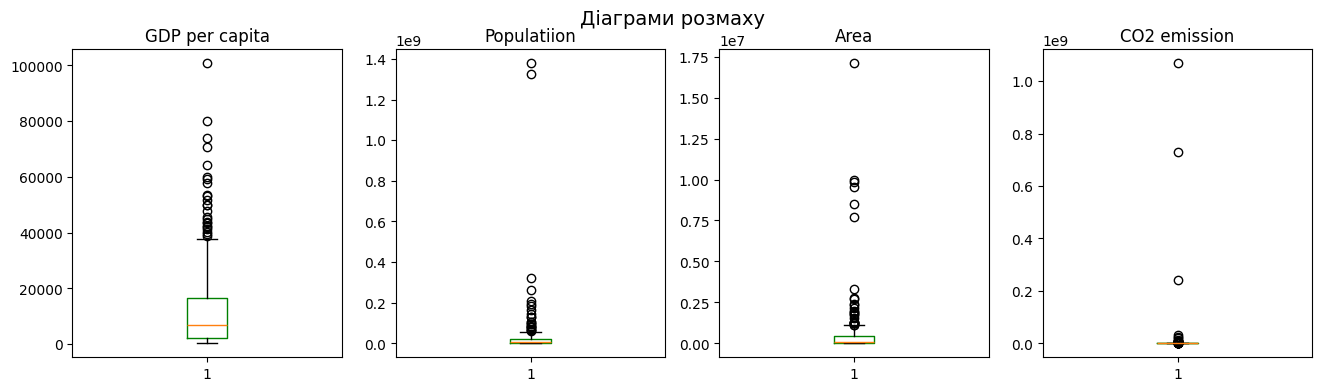

In [228]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 4, figsize=(16, 4))

fig.suptitle('Діаграми розмаху', fontsize=14)

axs[0].set_title('GDP per capita')
axs[0].boxplot(df['GDP per capita'], boxprops=dict(color='green'))

axs[1].set_title('Populatiion')
axs[1].boxplot(df['Populatiion'], boxprops=dict(color='green')) 

axs[2].set_title('Area')
axs[2].boxplot(df['Area'], boxprops=dict(color='green'))  

axs[3].set_title('CO2 emission')
axs[3].boxplot(df['CO2 emission'], boxprops=dict(color='green'))  

plt.show()

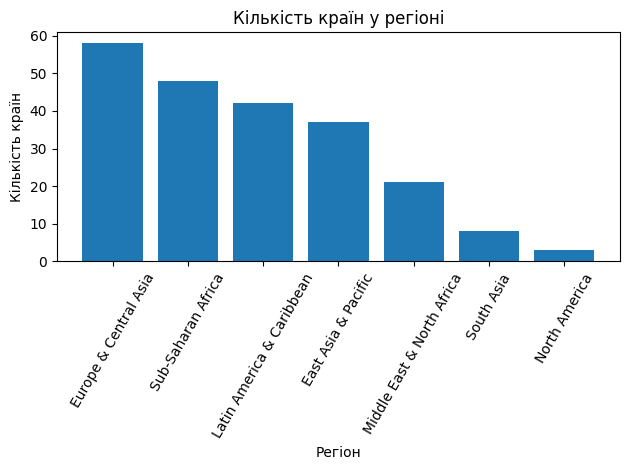

In [252]:
region_counts = df['Region'].value_counts()
plt.bar(region_counts.index, region_counts.values)

plt.xlabel('Регіон')
plt.ylabel('Кількість країн')
plt.title('Кількість країн у регіоні')

plt.xticks(region_counts.index, rotation=60) 
plt.tight_layout() 
plt.show()

<details><summary>Натисніть тут, щоб побачити підказку</summary>

```python
# Імпортуємо бібліотеку Matplotlib
import matplotlib.pyplot as plt
    
# діаграми розмаху для "GDP per capita", "Population", "CO2 emission" та "Area"

fig, axs = plt.subplots(1, 4, figsize=(16, 4))

fig.suptitle('Діаграми розмаху', fontsize=16)

axs[0].set_title('GDP per capita')
axs[0].boxplot(df['GDP per capita'])

axs[1].set_title('Population')
axs[1].boxplot(df['Population'])

axs[2].set_title('CO2 emission')
axs[2].boxplot(df['CO2 emission'])

axs[3].set_title('Area')
axs[3].boxplot(df['Area'])

plt.show()

```
</details>




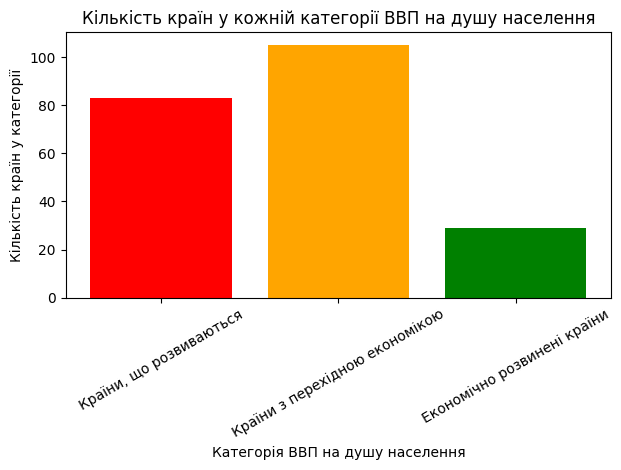

In [263]:
poor_count = df[df['GDP per capita'] < 4000].shape[0]
average_count = df[(df['GDP per capita'] > 4000) & (df['GDP per capita'] < 35000)].shape[0]
rich_count = df[df['GDP per capita'] > 35000].shape[0]

categories = ['Країни, що розвиваються', 'Країни з перехідною економікою', 'Економічно розвинені країни']
counts = [poor_count, average_count, rich_count]

plt.bar(categories, counts, color=['red', 'orange', 'green'])

plt.xlabel('Категорія ВВП на душу населення')
plt.ylabel('Кількість країн у категорії')
plt.title('Кількість країн у кожній категорії ВВП на душу населення')

plt.xticks(rotation=30) 
plt.tight_layout() 
plt.show()



<a name="task6"></a>
 <div class="alert alert-success alertsuccess" style="margin-top: 20px">

## <h2 id="task6"> Додаткове завдання: </h2>

<p>Дайте відповіді на питання</p>
</div>


1. Яка країна має найбільший ВВП на людину (GDP per capita)?
2. Яка країна має найменшу площу?
3. Знайдіть країну з найбільшою щільністю населення у світі? У Європі та центральній Азії?
4. Покажіть топ 5 країн та 5 останніх країн по ВВП на людину.



<details><summary>Натисніть тут, щоб побачити підказку</summary>
    
Скористайтесь методами <code>loc()</code> для повернення зрізу датафрейму, <code>idxmax()</code> для повернення номера рядка з найбільшим значенням якогось показника у стовпці та <code>idxmin()</code> для повернення номера рядка з найменшим значенням якогось показника у стовпці
    
```python
df.loc[df['GDP per capita'].idxmax()]

```
    
Гарно оформити виведення інформації допоможе <code>print()</code>  
```python
print('\n' + df.loc[df['GDP per capita'].idxmax(), 'Country Name'] + ' має найбільший ВВП на людину')
```   
  
</details>


In [267]:
# 1
print(df[df['GDP per capita'] == df['GDP per capita'].max()]['Country Name'])


115    Luxembourg
Name: Country Name, dtype: object


In [268]:
# 2
print(df[df['Area'] == df['Area'].min()]['Country Name'])


130    Monaco
Name: Country Name, dtype: object


In [275]:
# 3 
country_with_max_density = df[df['Population density'] == df['Population density'].max()]['Country Name']
print("Країна з найбільшою щільністю населення у світі:", country_with_max_density)

region_df = df[df['Region'] == 'Europe & Central Asia']
country_with_max_density_in_region = region_df.loc[region_df['Population density'].idxmax()]['Country Name']
print("Країна з найбільшою щільністю населення у Європі та центральній Азії:", country_with_max_density_in_region)

Країна з найбільшою щільністю населення у світі: 116    Macao SAR, China
Name: Country Name, dtype: object
Країна з найбільшою щільністю населення у Європі та центральній Азії: Monaco


In [277]:
# 4 
sorted_df = df.sort_values(by='GDP per capita', ascending=False)
top_5_countries = sorted_df.head(5)

print('Країни з найвищим ВВП на душу населення')
print(top_5_countries['Country Name'])

115          Luxembourg
188         Switzerland
116    Macao SAR, China
146              Norway
92              Ireland
Name: Country Name, dtype: object


In [278]:
# 4 
sorted_df = df.sort_values(by='GDP per capita', ascending=True)
top_5_countries = sorted_df.head(5)

print('Країни з найнижчим ВВП на душу населення')
print(top_5_countries['Country Name'])

Країни з найнижчим ВВП на душу населення
31                      Burundi
119                      Malawi
134                  Mozambique
37     Central African Republic
118                  Madagascar
Name: Country Name, dtype: object


Збережіть дані у новий файл 'clean_data2.csv':


In [279]:
df.to_csv('clean_data2.csv', index=False)

Виконав студент групи ІП-21 Пізнак Роман

<h2>Виконав студент групи ІП-21  <br>Пізнак Роман</h2>


В теоретичній частині роботи використано елементи курсу "Data Analysis with Python" від IBM Corporation, автор
<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork971-2022-01-01" target="_blank">Joseph Santarcangelo</a>


